In [3]:
import torch
#import argparse
import net
import cv2
import os
import numpy as np
from deploy import inference_img_whole

In [4]:
    image_list = ["result/example/image/boy-1518482_1920_12.png"]
    trimap_list = ["result/example/trimap/boy-1518482_1920_12.png"]

In [5]:
    cuda = False
    resume = "stage1_sad_54.4.pth"
    stage = 1
    crop_or_resize = "whole"
    max_size = 1600

In [8]:
    # init model
    model = net.VGG16()
    ckpt = torch.load(resume, map_location=torch.device('cpu'))
    model.load_state_dict(ckpt['state_dict'], strict=True)
    #model = model.cuda()

<All keys matched successfully>

In [11]:
    # infer one by one
    for image_path, trimap_path in zip(image_list, trimap_list):

        _, image_id = os.path.split(image_path)
        print("For " + image_id)
        
        image = cv2.imread(image_path)
        trimap = cv2.imread(trimap_path)[:, :, 0]

        torch.cuda.empty_cache()
        with torch.no_grad():
            pred_mattes = inference_img_whole(model, image, trimap)

        pred_mattes = (pred_mattes * 255).astype(np.uint8)
        pred_mattes[trimap == 255] = 255
        pred_mattes[trimap == 0  ] = 0

For boy-1518482_1920_12.png


In [12]:
pred_mattes

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
from PIL import Image

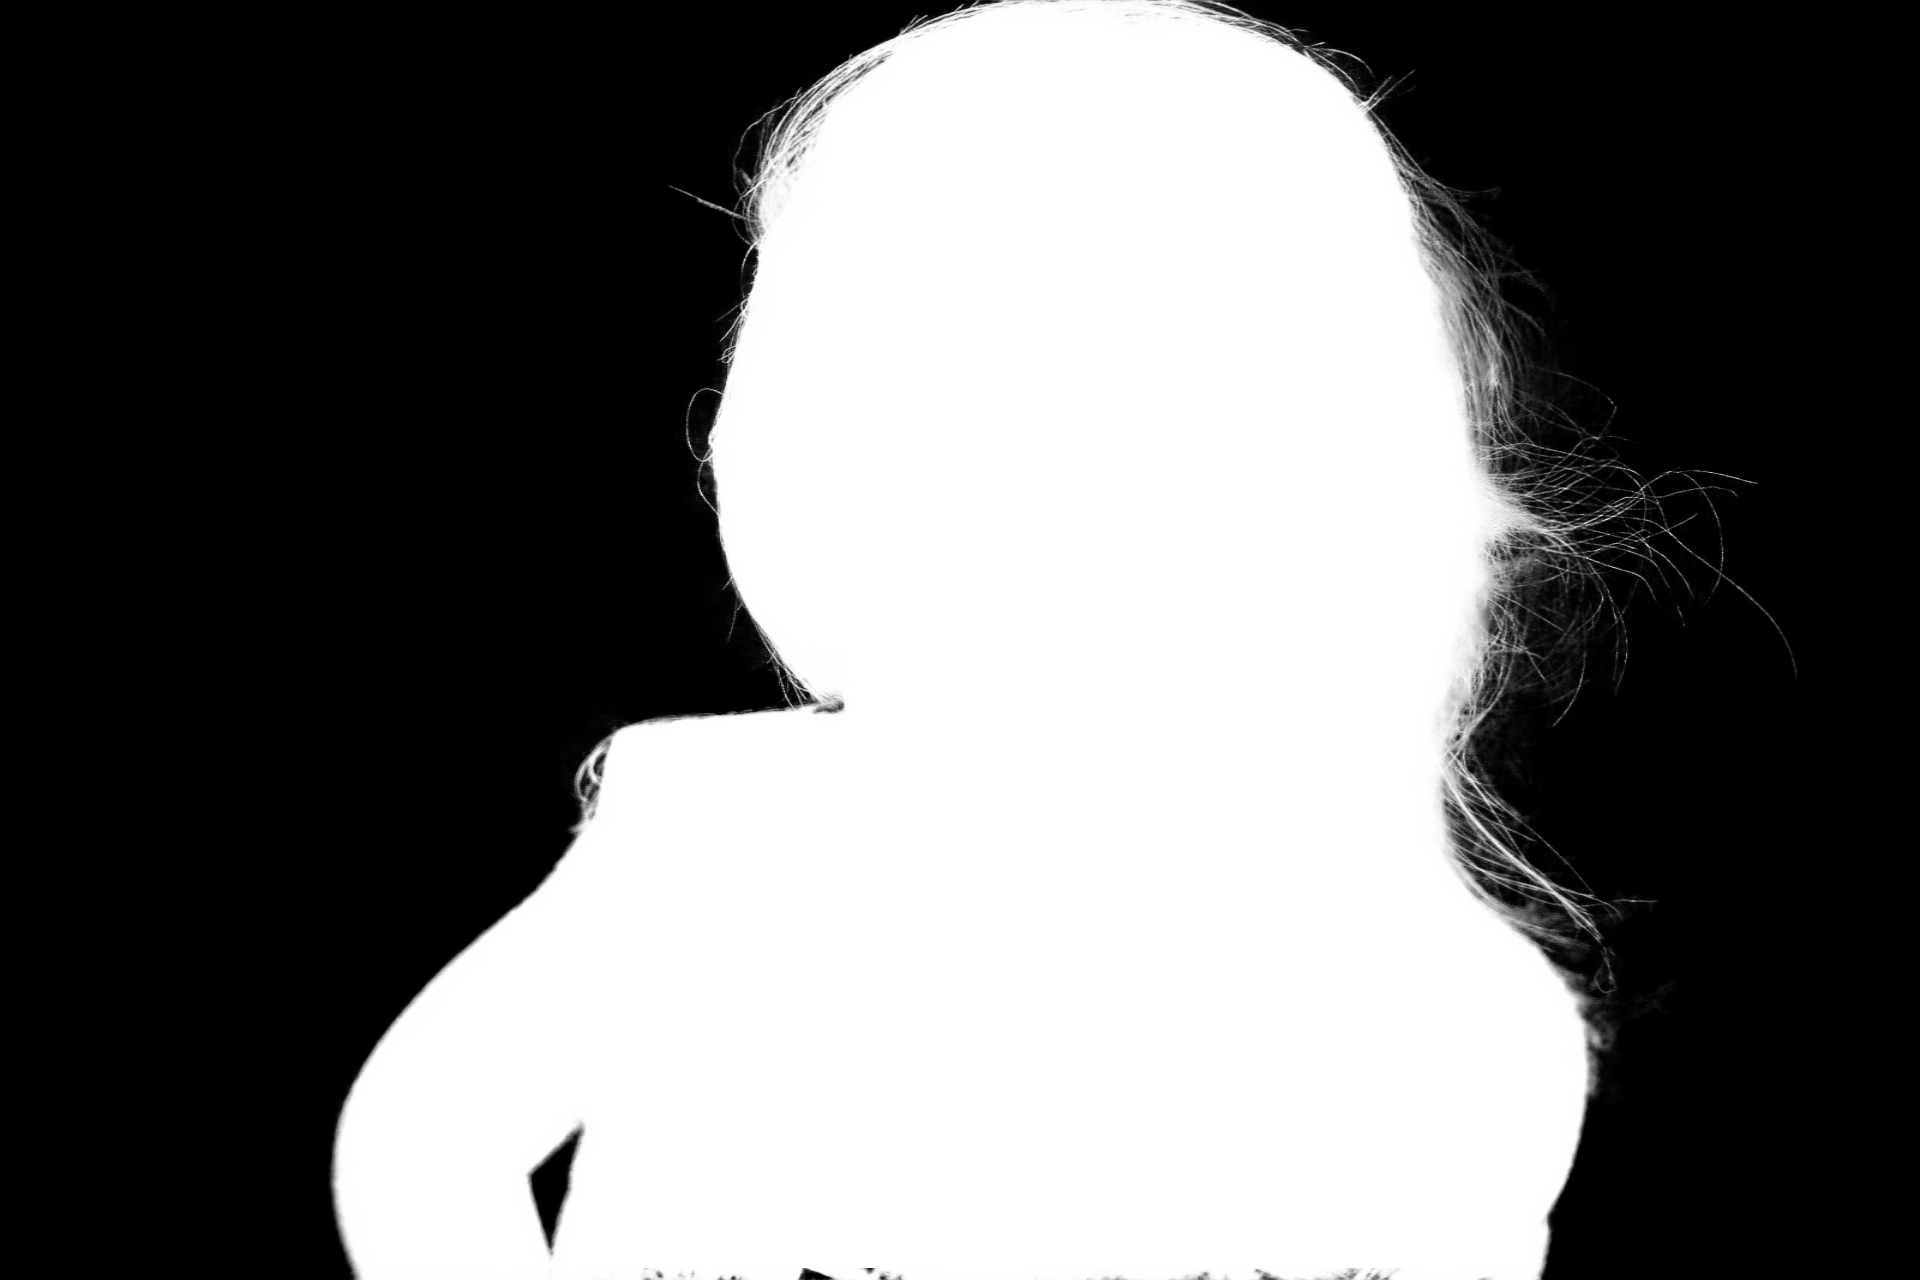

In [14]:
Image.fromarray(pred_mattes)

In [ ]:
import torch
#import argparse
import net
import cv2
import os
import numpy as np
from deploy import inference_img_whole

if __name__ == "__main__":

    # input file list
    image_list = [
        "result/example/image/boy-1518482_1920_12.png",
        "result/example/image/dandelion-1335575_1920_1.png",
        "result/example/image/light-bulb-376930_1920_11.png",
        "result/example/image/sieve-641426_1920_1.png",
        "result/example/image/spring-289527_1920_15.png",
    ]
    trimap_list = [
        "result/example/trimap/boy-1518482_1920_12.png",
        "result/example/trimap/dandelion-1335575_1920_1.png",
        "result/example/trimap/light-bulb-376930_1920_11.png",
        "result/example/trimap/sieve-641426_1920_1.png",
        "result/example/trimap/spring-289527_1920_15.png",
    ]
    result_dir = "result/example/pred"
    
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)

    # parameters setting
    parser = argparse.ArgumentParser()
    args = parser.parse_args()
    args.cuda = True
    args.resume = "model/stage1_sad_57.1.pth"
    args.stage = 1
    args.crop_or_resize = "whole"
    args.max_size = 1600

    # init model
    model = net.VGG16(args)
    ckpt = torch.load(args.resume)
    model.load_state_dict(ckpt['state_dict'], strict=True)
    model = model.cuda()

    # infer one by one
    for image_path, trimap_path in zip(image_list, trimap_list):

        _, image_id = os.path.split(image_path)
        print("For " + image_id)
        
        image = cv2.imread(image_path)
        trimap = cv2.imread(trimap_path)[:, :, 0]

        torch.cuda.empty_cache()
        with torch.no_grad():
            pred_mattes = inference_img_whole(args, model, image, trimap)

        pred_mattes = (pred_mattes * 255).astype(np.uint8)
        pred_mattes[trimap == 255] = 255
        pred_mattes[trimap == 0  ] = 0

        cv2.imwrite(os.path.join(result_dir, image_id), pred_mattes)